# K-mean кластеризація для генерації палітри кольорів зображення

In [1]:
import cv2
import math
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib.colors import to_hex
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15,10]

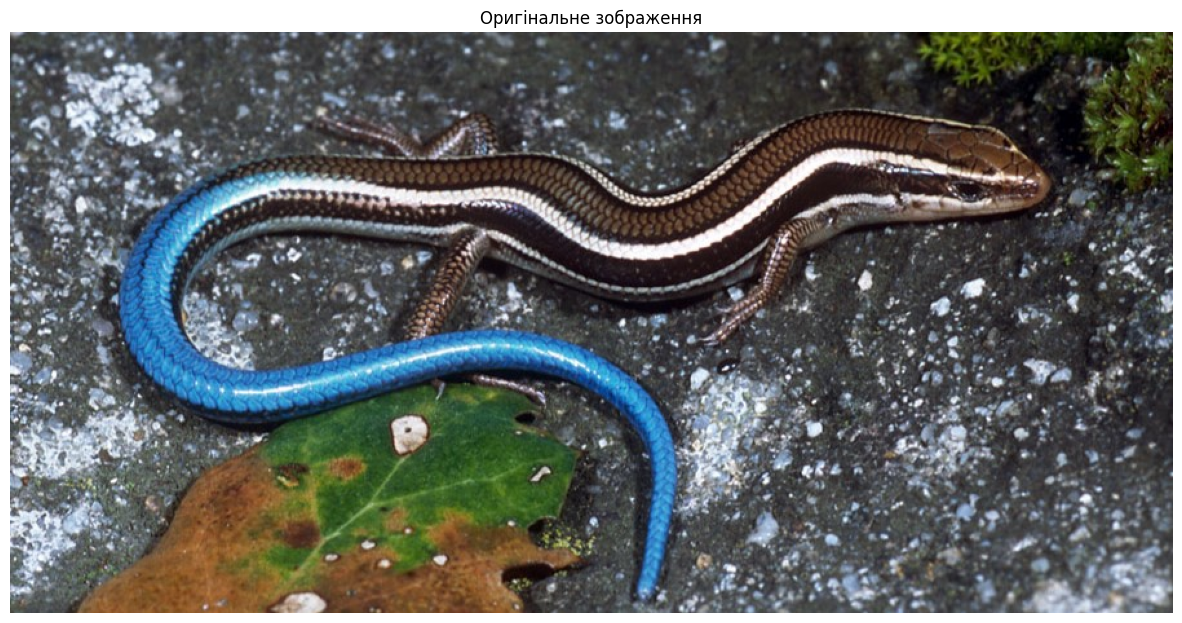

In [2]:
img = cv2.imread('../lab5_Verenchuk_Stanislav/data/blue-tail_skink.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('Оригінальне зображення')
plt.axis('off')
plt.show()

In [3]:
# Розміри зображення
rows, cols, channels = img.shape
print(f'Висота: {rows}, Ширина: {cols}')

Висота: 450, Ширина: 900


In [4]:
pixels = img.reshape(-1, 3)

df = pd.DataFrame(pixels, columns=['R', 'G', 'B'])
df

,R,G,B
0,156,155,160
1,169,168,174
2,180,180,188
3,180,182,194
4,183,184,202
...,...,...,...
404995,75,79,80
404996,73,74,78
404997,71,72,76
404998,71,72,76


In [5]:
def kmeans(color_clusters):
    clusters = KMeans(n_clusters=color_clusters, init='k-means++', random_state=42)
    return clusters

In [6]:
kmeans4 = kmeans(4)    # K-Means кластеризація для 4-х кольорів
kmeans16 = kmeans(16)  # K-Means кластеризація для 16-ти кольорів
kmeans32 = kmeans(32)  # K-Means кластеризація для 32-х кольорів

data4 = df
data16 = df
data32 = df

data4['cluster'] = kmeans4.fit_predict(data4[['R', 'G', 'B']])
data16['cluster'] = kmeans16.fit_predict(data16[['R', 'G', 'B']])
data32['cluster'] = kmeans32.fit_predict(data32[['R', 'G', 'B']])

In [7]:
#Центроїди кластерів

# для 4-х кольорів
centroids4 = kmeans4.cluster_centers_.astype(int)  # округлюємо до int для відображення
print('Отримані 4 кольори палітри (RGB):')
for i, center in enumerate(centroids4):
    print(f'Cluster {i + 1}: {center}')

# для 16-ти кольорів
centroids16 = kmeans16.cluster_centers_.astype(int)  # округлюємо до int для відображення
print('Отримані 16 кольорів палітри (RGB):')
for i, center in enumerate(centroids16):
    print(f'Cluster {i + 1}: {center}')

# для 32-х кольорів
centroids32 = kmeans32.cluster_centers_.astype(int)  # округлюємо до int для відображення
print('Отримані 32 кольори палітри (RGB):')
for i, center in enumerate(centroids32):
    print(f'Cluster {i + 1}: {center}')

Отримані 4 кольори палітри (RGB):
Cluster 1: [197 206 215]
Cluster 2: [84 83 75]
Cluster 3: [46 45 41]
Cluster 4: [108 133 154]
Отримані 16 кольорів палітри (RGB):
Cluster 1: [230 234 240]
Cluster 2: [70 72 74]
Cluster 3: [ 72 163 213]
Cluster 4: [131 137 145]
Cluster 5: [25 18 18]
Cluster 6: [86 90 92]
Cluster 7: [100  72  44]
Cluster 8: [189 200 211]
Cluster 9: [45 40 37]
Cluster 10: [106 111 116]
Cluster 11: [ 34  78 131]
Cluster 12: [ 43 123 188]
Cluster 13: [58 89 36]
Cluster 14: [133 100  51]
Cluster 15: [57 56 57]
Cluster 16: [159 166 178]
Отримані 32 кольори палітри (RGB):
Cluster 1: [240 242 246]
Cluster 2: [69 71 72]
Cluster 3: [133 142 153]
Cluster 4: [64 43 32]
Cluster 5: [90 94 98]
Cluster 6: [ 43 123 188]
Cluster 7: [33 24 23]
Cluster 8: [173 180 192]
Cluster 9: [103 119  49]
Cluster 10: [51 50 51]
Cluster 11: [50 59 14]
Cluster 12: [137 122 101]
Cluster 13: [ 61 154 210]
Cluster 14: [46 81 37]
Cluster 15: [78 82 84]
Cluster 16: [122  82  42]
Cluster 17: [214 221 231]
Clu

In [9]:
# Створення палітри кольорів
palette4 = np.zeros((50, 300, 3), dtype='uint8')
steps4 = 300 // 4

for i, color in enumerate(centroids4):
    palette4[:, i*steps4:(i+1)*steps4, :] = color

# для 4-х кольорів
palette4 = np.zeros((50, 300, 3), dtype='uint8')
steps4 = 300 // 4

for i, color in enumerate(centroids4):
    palette4[:, i*steps4:(i+1)*steps4, :] = color

# для 16-ти кольорів
palette16 = np.zeros((50, 300, 3), dtype='uint8')
steps16 = 300 // 16

for i, color in enumerate(centroids16):
    palette16[:, i*steps16:(i+1)*steps16, :] = color

# для 32-х кольорів
palette32 = np.zeros((50, 300, 3), dtype='uint8')
steps32 = 300 // 32

for i, color in enumerate(centroids32):
    palette32[:, i*steps32:(i+1)*steps32, :] = color

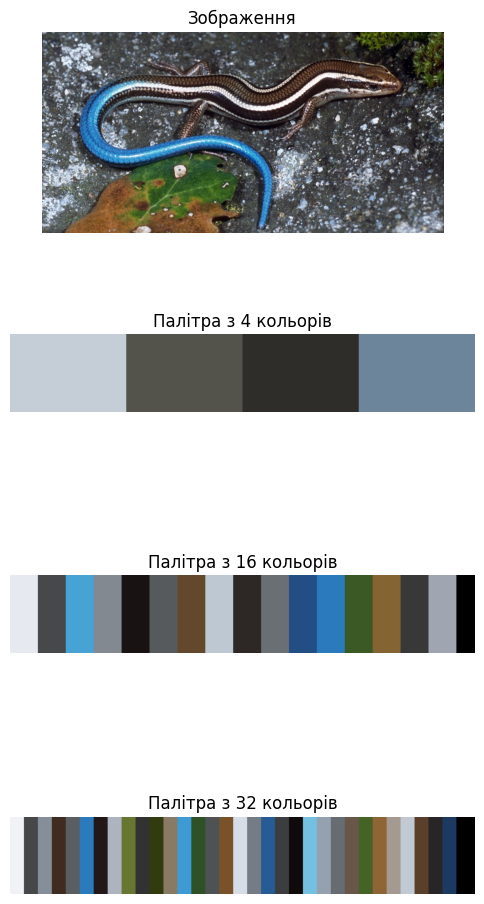

In [11]:
plt.figure(figsize=(6, 12))
plt.subplot(4, 1, 1)
plt.imshow(img)
plt.title('Зображення')
plt.axis('off')

plt.subplot(4, 1, 2)
plt.imshow(palette4)
plt.title(f'Палітра з 4 кольорів')
plt.axis('off')

plt.subplot(4, 1, 3)
plt.imshow(palette16)
plt.title(f'Палітра з 16 кольорів')
plt.axis('off')

plt.subplot(4, 1, 4)
plt.imshow(palette32)
plt.title(f'Палітра з 32 кольорів')
plt.axis('off')
plt.show()